Il Chicago SRW (Soft Red Winter) Wheat è un tipo di grano invernale. Quindi, il prezzo che stai considerando è relativo al grano invernale. Il grano invernale viene seminato in autunno, in genere tra settembre e novembre, e viene raccolto l'anno successivo, generalmente tra maggio e luglio

In [2]:
#pip install yfinance lxml

Importiamo le librerie necessarie:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import yfinance

Carichiamo il dataset `yield.csv` fornito da FAO.

In [113]:
yield_data = pd.read_csv("yield.csv")

In [114]:
yield_data.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


Descrivi ogni feature.

Visto che il nostro obiettivo è quello di predire il prezzo del grano(wheat in inglese), selezioniamo solo le colonne riguardanti il grano:

In [115]:
wheat_yield_data = yield_data[yield_data['Item'] == 'Wheat']
wheat_yield_data.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


In [96]:
wheat_yield_data.shape

(6160, 12)

Come possiamo notare, ci sono alcune colonne che non sono utili per il nostro modello di predizione(es. Domain Code, Domain, Area Code, Element Code, Element, Item Code, etc...), periò le eliminiamo chiamando il metodo `drop`.

In [116]:
wheat_yield_data = yield_data.drop(['Domain Code', 'Domain', 'Area Code', 'Element Code', 'Element', 'Item Code','Year Code'], axis = 1)
wheat_yield_data.tail()

,Area,Item,Year,Unit,Value
56712,Zimbabwe,Wheat,2012,hg/ha,24420
56713,Zimbabwe,Wheat,2013,hg/ha,22888
56714,Zimbabwe,Wheat,2014,hg/ha,21357
56715,Zimbabwe,Wheat,2015,hg/ha,19826
56716,Zimbabwe,Wheat,2016,hg/ha,18294


In [97]:
wheat_yield_data.shape

(6160, 12)

In [103]:
def show_yield_in_year(year, data):
    filtered_data = data[data['Year'] == year].sort_values(by='Value', ascending = 'True').tail()
    plt.figure(figsize=(10, 6))
    plt.bar(filtered_data['Area'], filtered_data['Value'])
    plt.xlabel('Area')
    plt.ylabel('Value')
    plt.title(f'Bar Chart for Year {year}')
    plt.show()

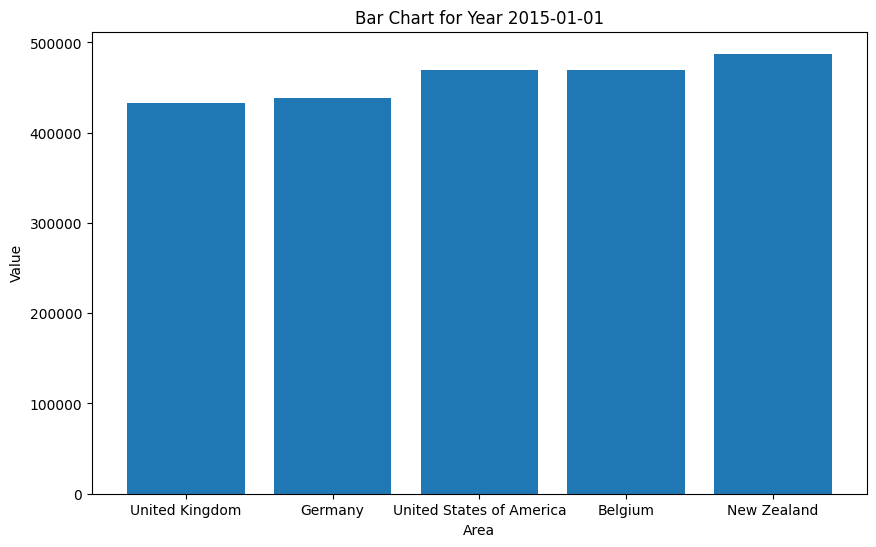

In [104]:
show_yield_in_year('2015-01-01', wheat_yield_data)

Vogliamo cambiare la struttura del dataframe. Il nostro obiettivo è quello di calcolare il quantitativo totale di grano coltivato per ogni anno.
Per prima cosa, estraiamo tutti gli anni, presi singolarmente, in un array. Ogni anno sarà l'indice della propria riga.

In [118]:
years = wheat_yield_data.loc[:,"Year"].unique()
years

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016], dtype=int64)

Dopodichè, sommiamo i quantitativi di grano prodotti da ogni paese in un determinato anno.

<AxesSubplot:xlabel='Year'>

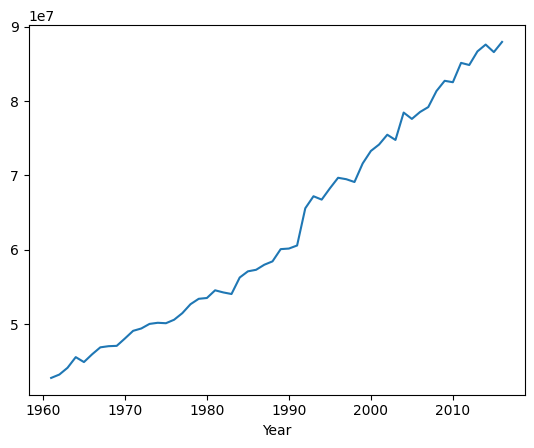

In [121]:
somma_per_anno = wheat_yield_data.groupby('Year')['Value'].sum()
somma_per_anno.plot()